In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [17]:
import os
from PIL import Image
import numpy as np

# Path to your image folder
image_folder = "C:/research paper/myresearch data/Total data/batch1_image/batch1img"

# List all .JPG or .jpg files
image_paths = [
    os.path.join(image_folder, file)
    for file in os.listdir(image_folder)
    if file.lower().endswith('.jpg')
]

print(f"Total images found: {len(image_paths)}")

# List to store all image arrays
image_data = []
valid_path1 = []

# Loop through all images
for idx, path in enumerate(image_paths):
    try:
        img = Image.open(path).convert('RGB')  # Ensure 3 channels
        img_resized = img.resize((224, 224))   # 💡 Resize to (224x224) or your model input size
        img_array = np.array(img_resized)      # Convert to NumPy array
        image_data.append(img_array)# Add to list
        valid_path1.append(os.path.basename(path))
        
        # Progress check every 500 images
        if (idx + 1) % 500 == 0:
            print(f"{idx + 1} images loaded...")

    except Exception as e:
        print(f"Error loading {path}: {e}")

# Convert list to NumPy array
image_data = np.array(image_data)

print(f"\n✅ All images loaded and stored! Shape: {image_data.shape}")




Total images found: 6005
500 images loaded...
1000 images loaded...
1500 images loaded...
2000 images loaded...
2500 images loaded...
3000 images loaded...
3500 images loaded...
4000 images loaded...
4500 images loaded...
5000 images loaded...
5500 images loaded...
6000 images loaded...

✅ All images loaded and stored! Shape: (6005, 224, 224, 3)


In [18]:
# Path to your image folder
image_folder2 = "C:/research paper/myresearch data/Total data/batch2_image/batch2img"

# List all .JPG or .jpg files
image_paths2 = [
    os.path.join(image_folder2, file)
    for file in os.listdir(image_folder2)
    if file.lower().endswith('.jpg')
]

print(f"Total images found: {len(image_paths2)}")

# List to store all image arrays
image_data2 = []
valid_path2=[]

# Loop through all images
for idx, path in enumerate(image_paths2):
    try:
        img = Image.open(path).convert('RGB')  # Ensure 3 channels
        img_resized = img.resize((224, 224))   # 💡 Resize to (224x224) or your model input size
        img_array = np.array(img_resized)      # Convert to NumPy array
        image_data2.append(img_array)           # Add to list
        valid_path2.append(os.path.basename(path))
        
        # Progress check every 500 images
        if (idx + 1) % 500 == 0:
            print(f"{idx + 1} images loaded...")

    except Exception as e:
        print(f"Error loading {path}: {e}")

# Convert list to NumPy array
image_data2 = np.array(image_data2)

print(f"\n✅ All images loaded and stored! Shape: {image_data2.shape}")



Total images found: 2503
500 images loaded...
1000 images loaded...
1500 images loaded...
2000 images loaded...
2500 images loaded...

✅ All images loaded and stored! Shape: (2503, 224, 224, 3)


In [19]:
#DATAFRAME bring all the data togather 
Data = pd.read_csv('combined_image_label_dataset.csv')
Data

,patient_name,path,histo_label,global_id
0,B1_0,0_001.Jpg,1,0
1,B1_0,0_002.Jpg,1,1
2,B1_0,0_003.Jpg,1,2
3,B1_0,0_004.Jpg,1,3
4,B1_0,0_005.Jpg,1,4
...,...,...,...,...
8495,B2_241,241_019_180801.Jpg,1,8495
8496,B2_241,241_020_180801.Jpg,1,8496
8497,B2_241,241_021_180801.Jpg,1,8497
8498,B2_241,241_022_180801.Jpg,1,8498


In [20]:
all_valid_paths = valid_path1 + valid_path2 
print(len(all_valid_paths))

8508


In [21]:
# Clean function to standardize path names (lowercase and strip extensions if needed)
def normalize_filename(name):
    return os.path.splitext(name.lower())[0]  # removes .jpg or .JPG

# Normalize both sets
Data['norm_path'] = Data['path'].apply(normalize_filename)
valid_paths_cleaned = [normalize_filename(p) for p in all_valid_paths]


In [22]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Assume you already have:
# - DataFrame `Data` with a 'path' column (8500 rows)
# - image_data (6005 images), image_data2 (2503 images)
# - valid_paths1 and valid_paths2 that collected filenames while loading

# 1. Combine image data and valid filenames
all_images = np.concatenate((image_data, image_data2), axis=0)
valid_paths = valid_path1 + valid_path2  # Should have 8508 entries

# 2. Normalize and clean file names from valid_paths
def clean_filename(path):
    filename = os.path.basename(path).strip().lower()
    return filename

valid_paths_cleaned = [clean_filename(p) for p in valid_paths]

# 3. Clean the DataFrame filenames
Data['path'] = Data['path'].str.strip().str.lower()

# 4. Filter the DataFrame to only include successfully loaded images
filtered_df = Data[Data['path'].isin(valid_paths_cleaned)].reset_index(drop=True)
print(f"✅ Matched {filtered_df.shape[0]} rows with loaded images")

# 5. Map image filenames to image arrays
image_dict = dict(zip(valid_paths_cleaned, all_images))

# 6. Rebuild ordered image array to match DataFrame order
ordered_images = np.array([image_dict[filename] for filename in filtered_df['path']])
print(f"✅ Final image array shape: {ordered_images.shape}")

# 7. Get the labels
labels = filtered_df['histo_label'].values  # or whichever column is your label

# 8. Ready for training
X = ordered_images
y = labels


✅ Matched 5893 rows with loaded images
✅ Final image array shape: (5893, 224, 224, 3)


In [76]:
import os
import numpy as np
import pandas as pd
import unicodedata
from collections import Counter

# === 1. Helper to normalize filenames ===
def clean_filename(p):
    name = os.path.basename(p)
    name = unicodedata.normalize('NFKC', name).strip().lower()  # Normalize unicode + lowercase
    name = os.path.splitext(name)[0] + '.jpg'  # Force .jpg extension
    return name

# === 2. Combine image arrays and paths ===
all_images = np.concatenate((image_data, image_data2), axis=0)
valid_paths = valid_path1 + valid_path2

# === 3. Normalize valid image filenames ===
valid_filenames = [clean_filename(p) for p in valid_paths]

# === 4. Normalize DataFrame path column ===
Data['path'] = Data['path'].apply(clean_filename)

# === 5. Check for duplicates ===
dupes = [item for item, count in Counter(valid_filenames).items() if count > 1]
print(f"🔁 Duplicate filenames in valid_paths: {len(dupes)}")

# === 6. Create dict from filename → image ===
image_dict = dict(zip(valid_filenames, all_images))  # if duplicates exist, only last one is kept

# === 7. Filter and match DataFrame to available images ===
filtered_df = Data[Data['path'].isin(image_dict.keys())].reset_index(drop=True)
print(f"✅ Matched: {filtered_df.shape[0]} out of {Data.shape[0]}")

# === 8. Debug unmatched entries ===
unmatched_paths = set(Data['path']) - set(image_dict.keys())
if unmatched_paths:
    print(f"❌ Unmatched images: {len(unmatched_paths)}")
    print("Sample unmatched:", list(unmatched_paths)[:10])

# === 9. Prepare model data ===
X = np.array([image_dict[filename] for filename in filtered_df['path']])
y = filtered_df['histo_label'].values

🔁 Duplicate filenames in valid_paths: 6005
✅ Matched: 5893 out of 8500
❌ Unmatched images: 2607
Sample unmatched: ['291_041.jpg', '214_014.jpg', '376_007.jpg', '28_007.jpg', '231_011.jpg', '227_035.jpg', '422_011.jpg', '434_006.jpg', '128_010.jpg', '251_011.jpg']


In [77]:
filtered_df

,patient_name,path,histo_label,global_id,norm_path
0,B1_0,0_001.jpg,1,0,0_001
1,B1_0,0_003.jpg,1,2,0_003
2,B1_0,0_004.jpg,1,3,0_004
3,B1_0,0_005.jpg,1,4,0_005
4,B1_0,0_006.jpg,1,5,0_006
...,...,...,...,...,...
5888,B2_241,241_019_180801.jpg,1,8495,241_019_180801
5889,B2_241,241_020_180801.jpg,1,8496,241_020_180801
5890,B2_241,241_021_180801.jpg,1,8497,241_021_180801
5891,B2_241,241_022_180801.jpg,1,8498,241_022_180801


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Normalize image data (0-1)
X = X.astype('float32') / 255.0

# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))






Epoch 1/10


148/148 [==============================] - 72s 472ms/step - loss: 0.6823 - accuracy: 0.6162 - val_loss: 0.6671 - val_accuracy: 0.6243
Epoch 2/10
148/148 [==============================] - 63s 426ms/step - loss: 0.6603 - accuracy: 0.6235 - val_loss: 0.6491 - val_accuracy: 0.6404
Epoch 3/10
148/148 [==============================] - 64s 433ms/step - loss: 0.6313 - accuracy: 0.6553 - val_loss: 0.6228 - val_accuracy: 0.6548
Epoch 4/10
148/148 [==============================] - 63s 425ms/step - loss: 0.6027 - accuracy: 0.6750 - val_loss: 0.6210 - val_accuracy: 0.6751
Epoch 5/10
148/148 [==============================] - 63s 427ms/step - loss: 0.5683 - accuracy: 0.6918 - val_loss: 0.5815 - val_accuracy: 0.6802
Epoch 6/10
148/148 [==============================] - 63s 427ms/step - loss: 0.5189 - accuracy: 0.7257 - val_loss: 0.5804 - val_accuracy: 0.6955
Epoch 7/10
148/148 [==============================] - 64s 431ms/step - loss: 0.4761 - accuracy: 0.7480 - val_loss: 0.5857 - 

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Normalize image data (0-1)
X = X.astype('float32') / 255.0

# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


Epoch 1/10
129/129 [==============================] - 70s 513ms/step - loss: 0.7205 - accuracy: 0.6182 - val_loss: 0.6624 - val_accuracy: 0.6244
Epoch 2/10
129/129 [==============================] - 70s 540ms/step - loss: 0.6667 - accuracy: 0.6233 - val_loss: 0.6571 - val_accuracy: 0.6244
Epoch 3/10
129/129 [==============================] - 69s 532ms/step - loss: 0.6528 - accuracy: 0.6279 - val_loss: 0.6506 - val_accuracy: 0.6482
Epoch 4/10
129/129 [==============================] - 69s 539ms/step - loss: 0.6345 - accuracy: 0.6448 - val_loss: 0.6252 - val_accuracy: 0.6618
Epoch 5/10
129/129 [==============================] - 67s 516ms/step - loss: 0.6053 - accuracy: 0.6567 - val_loss: 0.6196 - val_accuracy: 0.6606
Epoch 6/10
129/129 [==============================] - 65s 504ms/step - loss: 0.5712 - accuracy: 0.6756 - val_loss: 0.6092 - val_accuracy: 0.6702
Epoch 7/10
129/129 [==============================] - 65s 503ms/step - loss: 0.5280 - accuracy: 0.7127 - val_loss: 0.5946 - val_ac

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Normalize image data (0-1)
X = X.astype('float32') / 255.0

# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 6. Evaluate
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


Epoch 1/10
139/139 [==============================] - 64s 438ms/step - loss: 0.6694 - accuracy: 0.6228 - val_loss: 0.6622 - val_accuracy: 0.6242
Epoch 2/10
139/139 [==============================] - 60s 431ms/step - loss: 0.6658 - accuracy: 0.6243 - val_loss: 0.6630 - val_accuracy: 0.6242
Epoch 3/10
139/139 [==============================] - 60s 430ms/step - loss: 0.6660 - accuracy: 0.6243 - val_loss: 0.6646 - val_accuracy: 0.6242
Epoch 4/10
139/139 [==============================] - 60s 432ms/step - loss: 0.6649 - accuracy: 0.6243 - val_loss: 0.6632 - val_accuracy: 0.6242
Epoch 5/10
139/139 [==============================] - 61s 438ms/step - loss: 0.6636 - accuracy: 0.6243 - val_loss: 0.6620 - val_accuracy: 0.6242
Epoch 6/10
139/139 [==============================] - 60s 431ms/step - loss: 0.6643 - accuracy: 0.6243 - val_loss: 0.6620 - val_accuracy: 0.6242
Epoch 7/10
139/139 [==============================] - 60s 430ms/step - loss: 0.6651 - accuracy: 0.6243 - val_loss: 0.6620 - val_ac

C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# we created cnn models without spliting the data into malign or benign

now we split it into malign and benign

In [93]:
dataframe1=pd.read_excel('histo_label_0.xlsx')
dataframe1

,patient_name,path,histo_label,global_id
0,B1_1,1_001.Jpg,0,6
1,B1_1,1_002.Jpg,0,7
2,B1_1,1_003.Jpg,0,8
3,B1_1,1_004.Jpg,0,9
4,B1_1,1_005.Jpg,0,10
...,...,...,...,...
2990,B2_240,240_007_182509.Jpg,0,8480
2991,B2_240,240_008_182509.Jpg,0,8481
2992,B2_240,240_009_182509.Jpg,0,8482
2993,B2_240,240_010_182509.Jpg,0,8483


In [94]:
dataframe2=pd.read_excel('histo_label_1.xlsx')
dataframe2

,patient_name,path,histo_label,global_id
0,B1_0,0_001.Jpg,1,0
1,B1_0,0_002.Jpg,1,1
2,B1_0,0_003.Jpg,1,2
3,B1_0,0_004.Jpg,1,3
4,B1_0,0_005.Jpg,1,4
...,...,...,...,...
5500,B2_241,241_019_180801.Jpg,1,8495
5501,B2_241,241_020_180801.Jpg,1,8496
5502,B2_241,241_021_180801.Jpg,1,8497
5503,B2_241,241_022_180801.Jpg,1,8498


In [32]:
image_folder2 = "C:/Users/nalla/OneDrive/ドキュメント/Research data sets/dataset"

# List all .JPG or .jpg files
image_paths2 = [
    os.path.join(image_folder2, file)
    for file in os.listdir(image_folder2)
    if file.lower().endswith('.jpg')
]

print(f"Total images found: {len(image_paths2)}")

# List to store all image arrays
image_data2 = []
valid_path2=[]

# Loop through all images
for idx, path in enumerate(image_paths2):
    try:
        img = Image.open(path).convert('RGB')  # Ensure 3 channels
        img_resized = img.resize((224, 224))   # 💡 Resize to (224x224) or your model input size
        img_array = np.array(img_resized)      # Convert to NumPy array
        image_data2.append(img_array)           # Add to list
        valid_path2.append(os.path.basename(path))
        
        # Progress check every 500 images
        if (idx + 1) % 500 == 0:
            print(f"{idx + 1} images loaded...")

    except Exception as e:
        print(f"Error loading {path}: {e}")

# Convert list to NumPy array
image_data2 = np.array(image_data2)

print(f"\n✅ All images loaded and stored! Shape: {image_data2.shape}")



Total images found: 8508
500 images loaded...
1000 images loaded...
1500 images loaded...
2000 images loaded...
2500 images loaded...
3000 images loaded...
3500 images loaded...
4000 images loaded...
4500 images loaded...
5000 images loaded...
5500 images loaded...
6000 images loaded...
6500 images loaded...
7000 images loaded...
7500 images loaded...
8000 images loaded...
8500 images loaded...

✅ All images loaded and stored! Shape: (8508, 224, 224, 3)


In [33]:
import os
import numpy as np
import pandas as pd
import unicodedata
from collections import Counter

# === 1. Helper to normalize filenames ===
def clean_filename(p):
    name = os.path.basename(p)
    name = unicodedata.normalize('NFKC', name).strip().lower()  # Normalize unicode + lowercase
    name = os.path.splitext(name)[0] + '.jpg'  # Force .jpg extension
    return name

# === 2. Combine image arrays and paths ===
all_images =  image_data2
valid_paths =  valid_path2

# === 3. Normalize valid image filenames ===
valid_filenames = [clean_filename(p) for p in valid_paths]

# === 4. Normalize DataFrame path column ===
dataframe1['path'] = dataframe1['path'].apply(clean_filename)

# === 5. Check for duplicates ===
dupes = [item for item, count in Counter(valid_filenames).items() if count > 1]
print(f"🔁 Duplicate filenames in valid_paths: {len(dupes)}")

# === 6. Create dict from filename → image ===
image_dict = dict(zip(valid_filenames, all_images))  # if duplicates exist, only last one is kept

# === 7. Filter and match DataFrame to available images ===
filtered_df = dataframe1[dataframe1['path'].isin(image_dict.keys())].reset_index(drop=True)
print(f"✅ Matched: {filtered_df.shape[0]} out of {dataframe1.shape[0]}")

# === 8. Debug unmatched entries ===
unmatched_paths = set(dataframe1['path']) - set(image_dict.keys())
if unmatched_paths:
    print(f"❌ Unmatched images: {len(unmatched_paths)}")
    print("Sample unmatched:", list(unmatched_paths)[:10])


🔁 Duplicate filenames in valid_paths: 0
✅ Matched: 2214 out of 2995
❌ Unmatched images: 781
Sample unmatched: ['438_033.jpg', '247_011.jpg', '90_006.jpg', '546_015.jpg', '95_008.jpg', '214_014.jpg', '231_011.jpg', '28_007.jpg', '179_008.jpg', '129_010.jpg']


In [34]:
image_folder3 = "C:/Users/nalla/OneDrive/ドキュメント/Research data sets/dataset"

# List all .JPG or .jpg files
image_paths3 = [
    os.path.join(image_folder3, file)
    for file in os.listdir(image_folder3)
    if file.lower().endswith('.jpg')
]

print(f"Total images found: {len(image_paths3)}")

# List to store all image arrays
image_data3 = []
valid_path3=[]

# Loop through all images
for idx, path in enumerate(image_paths3):
    try:
        img = Image.open(path).convert('RGB')  # Ensure 3 channels
        img_resized = img.resize((224, 224))   # 💡 Resize to (224x224) or your model input size
        img_array = np.array(img_resized)      # Convert to NumPy array
        image_data3.append(img_array)           # Add to list
        valid_path3.append(os.path.basename(path))
        
        # Progress check every 500 images
        if (idx + 1) % 500 == 0:
            print(f"{idx + 1} images loaded...")

    except Exception as e:
        print(f"Error loading {path}: {e}")

# Convert list to NumPy array
image_data3 = np.array(image_data3)

print(f"\n✅ All images loaded and stored! Shape: {image_data3.shape}")



Total images found: 8508
500 images loaded...
1000 images loaded...
1500 images loaded...
2000 images loaded...
2500 images loaded...
3000 images loaded...
3500 images loaded...
4000 images loaded...
4500 images loaded...
5000 images loaded...
5500 images loaded...
6000 images loaded...
6500 images loaded...
7000 images loaded...
7500 images loaded...
8000 images loaded...
8500 images loaded...

✅ All images loaded and stored! Shape: (8508, 224, 224, 3)


In [35]:
import os
import numpy as np
import pandas as pd
import unicodedata
from collections import Counter

# === 1. Helper to normalize filenames ===
def clean_filename(p):
    name = os.path.basename(p)
    name = unicodedata.normalize('NFKC', name).strip().lower()  # Normalize unicode + lowercase
    name = os.path.splitext(name)[0] + '.jpg'  # Force .jpg extension
    return name

# === 2. Combine image arrays and paths ===
all_images =  image_data3
valid_paths =  valid_path3

# === 3. Normalize valid image filenames ===
valid_filenames = [clean_filename(p) for p in valid_paths]

# === 4. Normalize DataFrame path column ===
dataframe2['path'] = dataframe2['path'].apply(clean_filename)

# === 5. Check for duplicates ===
dupes = [item for item, count in Counter(valid_filenames).items() if count > 1]
print(f"🔁 Duplicate filenames in valid_paths: {len(dupes)}")

# === 6. Create dict from filename → image ===
image_dict = dict(zip(valid_filenames, all_images))  # if duplicates exist, only last one is kept

# === 7. Filter and match DataFrame to available images ===
filtered_df1 = dataframe2[dataframe2['path'].isin(image_dict.keys())].reset_index(drop=True)
print(f"✅ Matched: {filtered_df1.shape[0]} out of {dataframe2.shape[0]}")

# === 8. Debug unmatched entries ===
unmatched_paths = set(dataframe2['path']) - set(image_dict.keys())
if unmatched_paths:
    print(f"❌ Unmatched images: {len(unmatched_paths)}")
    print("Sample unmatched:", list(unmatched_paths)[:10])


🔁 Duplicate filenames in valid_paths: 0
✅ Matched: 3679 out of 5505
❌ Unmatched images: 1826
Sample unmatched: ['291_041.jpg', '376_007.jpg', '227_035.jpg', '422_011.jpg', '434_006.jpg', '128_010.jpg', '251_011.jpg', '197_019.jpg', '564_003.jpg', '448_017.jpg']


In [36]:
filtered_df

,patient_name,path,histo_label,global_id
0,B1_1,1_001.jpg,0,6
1,B1_1,1_002.jpg,0,7
2,B1_1,1_003.jpg,0,8
3,B1_1,1_004.jpg,0,9
4,B1_1,1_005.jpg,0,10
...,...,...,...,...
2209,B2_240,240_007_182509.jpg,0,8480
2210,B2_240,240_008_182509.jpg,0,8481
2211,B2_240,240_009_182509.jpg,0,8482
2212,B2_240,240_010_182509.jpg,0,8483


In [92]:
x_label0=filtered_df.drop('histo_label',axis=1)
y_label0=filtered_df['histo_label']
print(len(x_label0),len(y_label0))

5893 5893


In [45]:
x_label0

,patient_name,path,global_id
0,B1_1,1_001.jpg,6
1,B1_1,1_002.jpg,7
2,B1_1,1_003.jpg,8
3,B1_1,1_004.jpg,9
4,B1_1,1_005.jpg,10
...,...,...,...
2209,B2_240,240_007_182509.jpg,8480
2210,B2_240,240_008_182509.jpg,8481
2211,B2_240,240_009_182509.jpg,8482
2212,B2_240,240_010_182509.jpg,8483


# Benign test train data

In [47]:
x_train_label0,x_test_label0,y_train_label0,y_test_label0=train_test_split(x_label0,y_label0,test_size=0.30, stratify=None)

In [48]:
x_label1=filtered_df1.drop('histo_label',axis=1)
y_label1=filtered_df1['histo_label']
print(len(x_label1),len(y_label1))

3679 3679


In [49]:
x_label1

,patient_name,path,global_id
0,B1_0,0_001.jpg,0
1,B1_0,0_003.jpg,2
2,B1_0,0_004.jpg,3
3,B1_0,0_005.jpg,4
4,B1_0,0_006.jpg,5
...,...,...,...
3674,B2_241,241_019_180801.jpg,8495
3675,B2_241,241_020_180801.jpg,8496
3676,B2_241,241_021_180801.jpg,8497
3677,B2_241,241_022_180801.jpg,8498


# malignant test train data

In [50]:
x_train_label1,x_test_label1,y_train_label1,y_test_label1=train_test_split(x_label1,y_label1,test_size=0.30, stratify=None)

In [51]:
x_train_label1

,patient_name,path,global_id
673,B1_185,185_004.jpg,1929
731,B1_205,205_001.jpg,2131
2088,B1_589,589_001.jpg,5841
1289,B1_375,375_002.jpg,3764
292,B1_88,88_010.jpg,913
...,...,...,...
772,B1_220,220_007.jpg,2300
2862,B2_110,110_013_104712.jpg,7131
768,B1_220,220_001.jpg,2294
2319,B2_22,22_011_104455.jpg,6263


# implementing the model

In [102]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [114]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

# --- Ensure environment stays on CPU ---
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Prevent CUDA use
torch.cuda.is_available = lambda: False  # Override check

# Set CPU device
device = torch.device('cpu')
print(f"Using device: {device}")

# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None, root_dir=""):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.root_dir = root_dir

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = self.image_paths.iloc[idx]  # Make sure these are pandas Series
        label = self.labels.iloc[idx]
        full_path = os.path.join(self.root_dir, img_name)
        image = Image.open(full_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label, full_path

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Example: Load your data — replace with your own DataFrame
# Assuming 'filtered_df' is already loaded with columns 'path' and 'histo_label'
root_dir = r"C:\Users\nalla\OneDrive\ドキュメント\Research data sets\dataset"
train_df, test_df = train_test_split(filtered_df, test_size=0.2, stratify=filtered_df['histo_label'], random_state=42)

# Datasets and Loaders
train_dataset = CustomDataset(train_df['path'], train_df['histo_label'], transform, root_dir)
test_dataset = CustomDataset(test_df['path'], test_df['histo_label'], transform, root_dir)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, pin_memory=False)

# Model Setup
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# Optimizer *after* moving to CPU
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels, _ in loader:
        images, labels = images.to(device), labels.to(device)
        assert images.device.type == 'cpu' and labels.device.type == 'cpu'

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / total, 100 * correct / total

# Evaluation
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels, _ in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

# Train Loop
for epoch in range(10):
    loss, acc = train(model, train_loader, optimizer, criterion)
    test_acc = evaluate(model, test_loader)
    print(f"Epoch {epoch+1} | Train Loss: {loss:.4f} | Train Acc: {acc:.2f}% | Test Acc: {test_acc:.2f}%")



Using device: cpu


C:\Users\nalla\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nalla\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | Train Loss: 0.7203 | Train Acc: 60.63% | Test Acc: 62.43%
Epoch 2 | Train Loss: 0.6752 | Train Acc: 61.14% | Test Acc: 60.90%
Epoch 3 | Train Loss: 0.6758 | Train Acc: 61.03% | Test Acc: 60.31%
Epoch 4 | Train Loss: 0.6679 | Train Acc: 62.41% | Test Acc: 61.66%
Epoch 5 | Train Loss: 0.6595 | Train Acc: 62.77% | Test Acc: 62.51%
Epoch 6 | Train Loss: 0.6636 | Train Acc: 62.56% | Test Acc: 62.51%
Epoch 7 | Train Loss: 0.6521 | Train Acc: 63.19% | Test Acc: 62.60%
Epoch 8 | Train Loss: 0.6451 | Train Acc: 63.36% | Test Acc: 59.03%
Epoch 9 | Train Loss: 0.6412 | Train Acc: 63.87% | Test Acc: 64.80%
Epoch 10 | Train Loss: 0.6149 | Train Acc: 66.02% | Test Acc: 62.51%


# model is built and has predicted now we add explainability.


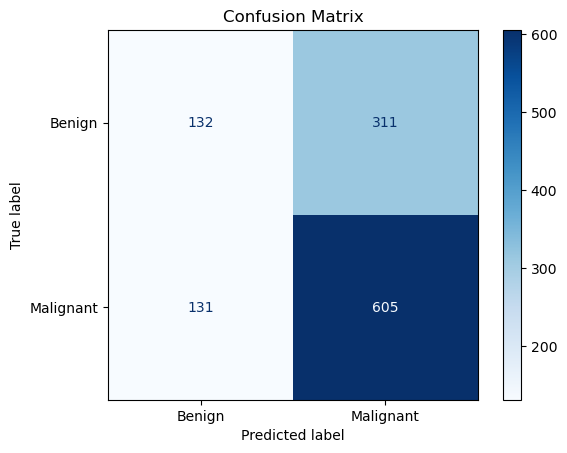

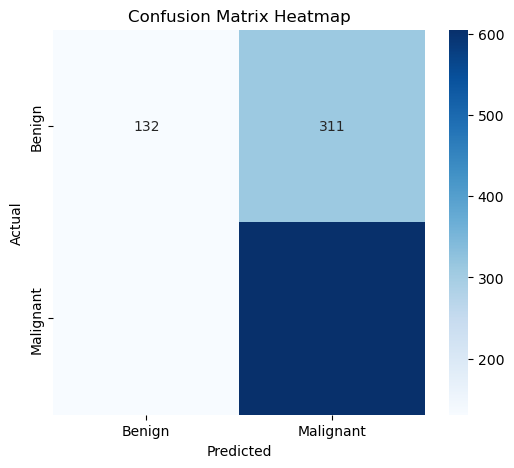

In [120]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# 1. Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()




100%|██████████████████████████████████████████████████████████████████████████████| 1179/1179 [01:18<00:00, 15.00it/s]


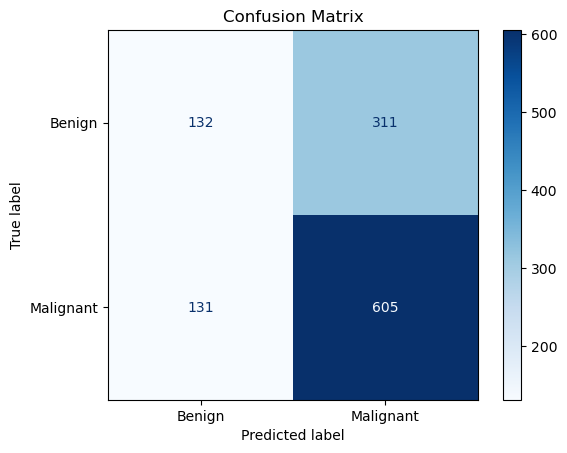

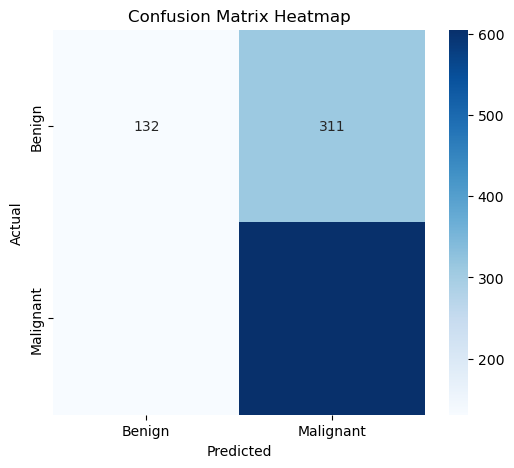

In [124]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from tqdm import tqdm

# Assuming device, model, and test_loader are defined
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels, _ in tqdm(test_loader):  # Adjust if 2 or 3 values
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Optional: Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [1]:
y_preds = []
y_true = []

model.eval()
with torch.no_grad():
    for images, labels, _ in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        y_preds.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())


NameError: name 'model' is not defined

In [113]:
# Grad-CAM
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook()

    def hook(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, input_tensor, target_class=None):
        self.model.eval()
        output = self.model(input_tensor)
        if target_class is None:
            target_class = output.argmax().item()

        loss = output[0, target_class]
        self.model.zero_grad()
        loss.backward()

        pooled_grads = self.gradients.mean(dim=[0, 2, 3])
        cam = (pooled_grads[:, None, None] * self.activations[0]).sum(dim=0)

        cam = torch.relu(cam)
        cam -= cam.min()
        cam /= cam.max() + 1e-8  # Prevent division by zero
        cam = cam.cpu().numpy()
        cam = cv2.resize(cam, (224, 224))
        return cam

# Visualize Grad-CAM
def show_cam_on_image(img_path, cam):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    cam = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run Grad-CAM
gradcam = GradCAM(model, model.layer4[1].conv2)
sample_img, _, img_path = next(iter(test_loader))
sample_img = sample_img.to(device)
cam = gradcam(sample_img)
show_cam_on_image(img_path[0], cam)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [115]:
from PIL import Image

def show_cam_on_image(img_path, cam):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img)
    cam = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    


In [112]:
plt.show()

In [110]:
print(img_path[0])
print(os.path.exists(img_path[0]))
%matplotlib inline


C:\Users\nalla\OneDrive\ドキュメント\Research data sets\dataset\220_015.jpg
True
